In [140]:
# Write your imports here

import re
import pycountry
import pycountry_convert as pc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [55]:
coffee_df = pd.read_csv('data\.ipynb_checkpoints\merged_data_cleaned-checkpoint.csv')

In [56]:
coffee_df
coffee_df = coffee_df.drop(columns=['Unnamed: 0'])

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [57]:
coffee_df.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

There are 43 features, actually 42 when we take the first column, the one holding the index, out of account, and 1339 observations. At a first glance, we can see that some of the features could potentially be messy. Such as, bag weight which needs to be int or float and is an object, harvest year, altitude, etc.

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

To avoid manually correcting each feature name, we are going to accomplish this via a simple function which will handle the snake_case conversion for us.

In [58]:
def to_pythonic(name):
    name = name.strip()
    name = name.lower()
    name = name.replace(' ', '_')
    name = name.replace('-', '_')
    name = name.replace('.', '_')
    
    return name

In [59]:
coffee_df.columns = [to_pythonic(col) for col in coffee_df.columns]

In [60]:
coffee_df.dtypes

species                   object
owner                     object
country_of_origin         object
farm_name                 object
lot_number                object
mill                      object
ico_number                object
company                   object
altitude                  object
region                    object
producer                  object
number_of_bags             int64
bag_weight                object
in_country_partner        object
harvest_year              object
grading_date              object
owner_1                   object
variety                   object
processing_method         object
aroma                    float64
flavor                   float64
aftertaste               float64
acidity                  float64
body                     float64
balance                  float64
uniformity               float64
clean_cup                float64
sweetness                float64
cupper_points            float64
total_cup_points         float64
moisture  

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [61]:
coffee_df['bag_weight']

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [62]:
coffee_df['bag_weight'].unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

Since there are only values in kg, lbs, or no unit measure, we can create a simple function to handle the conversion for us, and we will consider the values in kilograms. Let's accomplish this via a regex to filter through the different values.

In [63]:
def convert_to_kg(value):
    lbs_to_kg = 0.45359237

    match = re.match(r'([0-9.]+)\s*([a-zA-Z]*)', str(value))
    if match:
        number = float(match.group(1))
        unit = match.group(2).lower()

        if unit in ['kg', 'kgs', 'kilogram', 'kilograms', '']:
            return number
        elif unit in ['lb', 'lbs', 'pound', 'pounds']:
            return number * lbs_to_kg
        else:
            return None
    else:
        return None

coffee_df['bag_weight'] = coffee_df['bag_weight'].apply(convert_to_kg)

coffee_df['bag_weight'] = coffee_df['bag_weight'].fillna(0).astype(int)

In [64]:
coffee_df.dtypes

species                   object
owner                     object
country_of_origin         object
farm_name                 object
lot_number                object
mill                      object
ico_number                object
company                   object
altitude                  object
region                    object
producer                  object
number_of_bags             int64
bag_weight                 int32
in_country_partner        object
harvest_year              object
grading_date              object
owner_1                   object
variety                   object
processing_method         object
aroma                    float64
flavor                   float64
aftertaste               float64
acidity                  float64
body                     float64
balance                  float64
uniformity               float64
clean_cup                float64
sweetness                float64
cupper_points            float64
total_cup_points         float64
moisture  

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

Let's first check the values in this column to see what we are dealing with.

In [65]:
coffee_df['harvest_year'].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

The harvest_year column clearly consists of multiple variations for harvest year, only some of which are in the correct format. In order to handle this, we are going to use regex once more, where we are going to search for exact matches of the year, year with text, range of years, quarters and non-year values, and extract the year where possible.

In [66]:
def extract_year(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).lower().strip()

    year_match = re.match(r'^\d{4}$', value)
    if year_match:
        return int(year_match.group(0))

    range_match = re.match(r'(\d{4})[^\d]*(\d{4})', value)
    if range_match:
        start_year = int(range_match.group(1))
        end_year = int(range_match.group(2))
        return int((start_year + end_year) / 2)

    single_year_match = re.search(r'(\d{4})', value)
    if single_year_match:
        return int(single_year_match.group(1))
    
    quarter_match = re.search(r'(\d{1}[tq])[\D]*(\d{4})', value)
    if quarter_match:
        return int(quarter_match.group(2))
    
    return np.nan

coffee_df['harvest_year'] = coffee_df['harvest_year'].apply(extract_year)

coffee_df['harvest_year'] = coffee_df['harvest_year'].astype(pd.Int64Dtype())

In [67]:
coffee_df['harvest_year'].unique()

<IntegerArray>
[2014, <NA>, 2013, 2012, 2010, 2009, 2015, 2011, 2016, 2017, 2018, 7201]
Length: 12, dtype: Int64

All looks good now.

Let's proceed to expiration date and grading date.

In [68]:
coffee_df['expiration']

0           April 3rd, 2016
1           April 3rd, 2016
2            May 31st, 2011
3          March 25th, 2016
4           April 3rd, 2016
               ...         
1334     January 18th, 2017
1335     January 18th, 2017
1336    December 23rd, 2015
1337      August 25th, 2015
1338      August 25th, 2015
Name: expiration, Length: 1339, dtype: object

In [69]:
coffee_df['grading_date']

0           April 4th, 2015
1           April 4th, 2015
2            May 31st, 2010
3          March 26th, 2015
4           April 4th, 2015
               ...         
1334     January 19th, 2016
1335     January 19th, 2016
1336    December 23rd, 2014
1337      August 25th, 2014
1338      August 25th, 2014
Name: grading_date, Length: 1339, dtype: object

We are going to use a similar approach to handle both columns conversion to datetime. A simple function including a regex will take care of extracting the date without ordinal suffix, then we will apply the function to both columns in order to clean the date strings throughout, and after that we will convert to datetime. 

In [70]:
def clean_date(date_str, index=None):

    if pd.isna(date_str) or not date_str.strip():
        if index is not None:
            print(f"Index {index}: Empty or NaN value")
            return np.nan

    date_str = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
    date_str = date_str.strip()
    
    return date_str

In [72]:
# Expiration date cleanup

coffee_df['expiration'] = coffee_df['expiration'].apply(clean_date)
coffee_df['expiration'] = pd.to_datetime(coffee_df['expiration'], format='%B %d, %Y')

In [71]:
# Grading dates cleanup

coffee_df['grading_date'] = coffee_df['grading_date'].apply(clean_date)
coffee_df['grading_date'] = pd.to_datetime(coffee_df['grading_date'], format='%B %d, %Y')

Both columns look good now and properly formatted.

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [77]:
unknown_values = ['', 'unknown', 'N/A', 'nan']
coffee_df['country_of_origin'] = coffee_df['country_of_origin'].replace(unknown_values, pd.NA)
unknown_origin_count = coffee_df['country_of_origin'].isna().sum()

print(f"Number of entries with unknown origin: {unknown_origin_count}")

Number of entries with unknown origin: 1


There are several approaches to unknown values:

1. We can simply drop them, and in this case it could be OK to do so, since it's just one entry.
2. We can create a new category 'unknown'and keep the observations to it, which does not seem like an appropriate option in our case. 
3. We can use estimation to recover the missing values - the most frequent country of origin, other related features which can tell us what the missing value is, or a prediction model, which in this case seems like an overkill for just one missing entry.
4. We can analyse these entries separately, in case we think they could affect the overall analysis and to observe how exactly.

In our coffee case, I'd go for dropping the row completely, as it represents only a very small fraction of the whole dataset and it will unlikely affect the analysis significantly.

In [102]:
coffee_df = coffee_df.dropna(subset=['country_of_origin'])

unknown_origin_count = coffee_df['country_of_origin'].isna().sum()
print(f"Number of entries with unknown origin: {unknown_origin_count}")


Number of entries with unknown origin: 0


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [87]:
coffee_df['owner']

0                      metad plc
1                      metad plc
2       grounds for health admin
3            yidnekachew dabessa
4                      metad plc
                  ...           
1334                 luis robles
1335                 luis robles
1336                 james moore
1337               cafe politico
1338               cafe politico
Name: owner, Length: 1338, dtype: object

In [82]:
coffee_df['owner_1']

0                      metad plc
1                      metad plc
2       Grounds for Health Admin
3            Yidnekachew Dabessa
4                      metad plc
                  ...           
1334                 Luis Robles
1335                 Luis Robles
1336                 James Moore
1337               Cafe Politico
1338               Cafe Politico
Name: owner_1, Length: 1338, dtype: object

In [83]:
coffee_df['producer']

0                                   METAD PLC
1                                   METAD PLC
2                                         NaN
3       Yidnekachew Dabessa Coffee Plantation
4                                   METAD PLC
                        ...                  
1334            Café Robusta del Ecuador S.A.
1335            Café Robusta del Ecuador S.A.
1336                             Cafe Cazengo
1337                                      NaN
1338                                      NaN
Name: producer, Length: 1338, dtype: object

What we need to do here is first to standardize owner and owner_1 columns by converting to lowercase. Then we will confirm both columns are identical, if so, we will drop owner_1, if they aren't we will merge the content of both and then drop owner_1.

In [117]:
coffee_df['owner'] = coffee_df['owner'].str.lower()
coffee_df['owner_1'] = coffee_df['owner_1'].str.lower()

differences = coffee_df[coffee_df['owner'] != coffee_df['owner_1']]
print("Differences between 'owner' and 'owner_1':")
print(differences)

coffee_df['owner_combined'] = coffee_df['owner'].combine_first(coffee_df['owner_1'])

print("Merged 'owner_combined' column:")
print(coffee_df[['owner', 'owner_1', 'owner_combined']])

coffee_df.drop(columns=['owner', 'owner_1'], inplace=True)

Differences between 'owner' and 'owner_1':
      species owner country_of_origin                   farm_name lot_number  \
364   Arabica   NaN          Honduras                los hicaques        NaN   
459   Arabica   NaN          Honduras                los hicaques        NaN   
602   Arabica   NaN          Colombia  supply chain ecom cca s.a.        NaN   
848   Arabica   NaN          Honduras  gran manzana y el aguacate        NaN   
882   Arabica   NaN          Honduras  gran manzana y el aguacate        NaN   
975   Arabica   NaN          Honduras                los hicaques        NaN   
1044  Arabica   NaN          Honduras                los hicaques        NaN   

             mill  ico_number        company        altitude          region  \
364    cigrah sps  13-111-240         cigrah            1350       comayagua   
459    cigrah sps  13-111-193         cigrah            1350       comayagua   
602   south huila   3-79-0334  ecom cca s.a.  1400 thru 1850     south huila

Now, let's deal with the producer column. The options are dropping NaN, filling them with default values, or "merging" them with data from owner_combined. In this case, since there are differences between owner and producer, although they may coincide in cases, I prefer to use a default value for producer and substitute NaN with "unknown producer" or something similar.

In [123]:
coffee_df['producer'] = coffee_df['producer'].fillna('Unknown Producer')

In [124]:
coffee_df['producer']

0                                   METAD PLC
1                                   METAD PLC
2                            Unknown Producer
3       Yidnekachew Dabessa Coffee Plantation
4                                   METAD PLC
                        ...                  
1334            Café Robusta del Ecuador S.A.
1335            Café Robusta del Ecuador S.A.
1336                             Cafe Cazengo
1337                         Unknown Producer
1338                         Unknown Producer
Name: producer, Length: 1338, dtype: object

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [125]:
coffee_df['color']

0            Green
1            Green
2              NaN
3            Green
4            Green
           ...    
1334    Blue-Green
1335    Blue-Green
1336           NaN
1337         Green
1338           NaN
Name: color, Length: 1338, dtype: object

First, we will take care of the NaN values in the color column, which we will substitute with "unknown" throughout, in order to have more comprehensive data better prepared for analysis.

In [126]:
coffee_df['color'] = coffee_df['color'].fillna('unknown')

We will now create pivot tables for countries and continents.

In [133]:
# Country-Level Pivot Table
pivot_country = coffee_df.pivot_table(index='country_of_origin', columns='color', aggfunc='size', fill_value=0)
pivot_country.reset_index(inplace=True)
pivot_country_long = pivot_country.melt(id_vars='country_of_origin', var_name='color', value_name='count')

print(pivot_country_long)

               country_of_origin       color  count
0                         Brazil  Blue-Green     14
1                        Burundi  Blue-Green      0
2                          China  Blue-Green      0
3                       Colombia  Blue-Green      8
4                     Costa Rica  Blue-Green     10
..                           ...         ...    ...
139                United States     unknown      9
140       United States (Hawaii)     unknown     30
141  United States (Puerto Rico)     unknown      0
142                      Vietnam     unknown      4
143                       Zambia     unknown      1

[144 rows x 3 columns]


In [134]:
coffee_df['country_of_origin'].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

In order to create a pivot table with continent data, and not do it manually, we first need to set up a function that will utilize pycountry library, so that it can extract the continent by the given country automatically. Then, using it, we will populate our dataset with a continent column. Afterwards, we will repeat the process of creating the long pivot table.

In [142]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return None
    
coffee_df['continent'] = coffee_df['country_of_origin'].apply(country_to_continent)

In [144]:
# Continent-Level Pivot Table
pivot_continent = coffee_df.pivot_table(index='continent', columns='color', aggfunc='size', fill_value=0)
pivot_continent.reset_index(inplace=True)
pivot_continent_long = pivot_continent.melt(id_vars='continent', var_name='color', value_name='count')

print(pivot_continent_long)

        continent         color  count
0          Africa    Blue-Green      6
1            Asia    Blue-Green     24
2   North America    Blue-Green     25
3         Oceania    Blue-Green      0
4   South America    Blue-Green     24
5          Africa  Bluish-Green     21
6            Asia  Bluish-Green     20
7   North America  Bluish-Green     31
8         Oceania  Bluish-Green      1
9   South America  Bluish-Green     23
10         Africa         Green    101
11           Asia         Green    106
12  North America         Green    423
13        Oceania         Green      0
14  South America         Green    216
15         Africa       unknown     33
16           Asia       unknown     32
17  North America       unknown    109
18        Oceania       unknown      0
19  South America       unknown     65


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

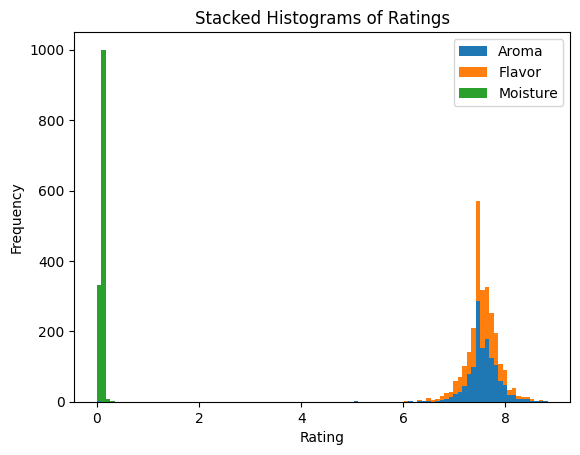

In [158]:
plt.hist([coffee_df['aroma'], coffee_df['flavor'], coffee_df['moisture']], bins=100, label=['Aroma', 'Flavor', 'Moisture'], stacked=True)
plt.title('Stacked Histograms of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [153]:
correlation_af = round(coffee_df['aroma'].corr(coffee_df['flavor']), 2)

print("Correlation between aroma and flavor:\n", correlation_af)

correlation_mf = round(coffee_df['moisture'].corr(coffee_df['flavor']))
print("Correlation between moisture and flavor:\n", correlation_mf)

Correlation between aroma and flavor:
 0.81
Correlation between moisture and flavor:
 0


It is clear that the moisture rating is quite low and has inverse correlation to the flavor. At the same time, aroma correlates with flavor, affecting it a great deal. Let's explore the average values.

In [154]:
avg_flavor = coffee_df['flavor'].mean()
avg_aroma = coffee_df['aroma'].mean()
avg_moisture = coffee_df['moisture'].mean()

print(f"Average flavor rating: {avg_flavor:.2f}\nAverage aroma rating: {avg_aroma:.2f}\nAverage moisture rating: {avg_moisture:.2f}")

Average flavor rating: 7.52
Average aroma rating: 7.57
Average moisture rating: 0.09


### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!